In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

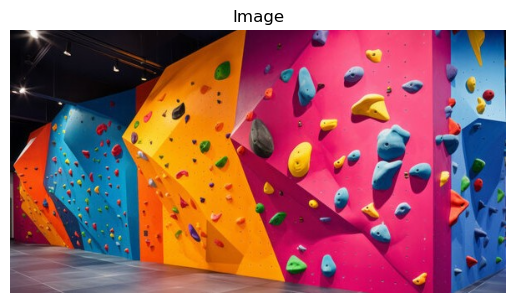

In [22]:
img = cv.imread("img/parede13.jpg", cv.IMREAD_UNCHANGED)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Image")
plt.axis("off")
plt.show()

In [ ]:
new_img = img_rgb.copy()
cyan = np.array([121, 196, 218])

# print(img_rgb[50, 50])

def distance(arr1, arr2):
    return np.sqrt(np.sum((arr1 - arr2) ** 2))

In [ ]:
distance = np.linalg.norm(img_rgb - cyan, axis=2)

# Create a mask where distance < 50
mask = distance < 80

# Apply mask: keep pixels close to cyan, set others to black
new_img = np.zeros_like(img_rgb)
new_img[mask] = img_rgb[mask]

# Show the result
plt.imshow(new_img)
plt.title("Filtered Cyan Pixels")
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))  # Width x Height in inches

# Original image
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.imshow(img_rgb)
plt.title("Original (RGB)")
plt.axis("off")

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(new_img)
plt.title("Filtered (Cyan Pixels)")
plt.axis("off")

# Show the images
plt.tight_layout()
plt.show()

In [ ]:
# shape = img.shape

# for i in range(shape[0]):
#     for j in range(shape[1]):
#         if distance(img_rgb[i, j], cyan) < 50:
#             new_img[i, j] = img_rgb[i, j]
#         else:
#             new_img[i, j] = (0, 0, 0)

In [ ]:
plt.imshow(new_img)
plt.title("Image")
plt.axis("off")
plt.show()

In [ ]:
img = cv.imread("img/parede.jpg", cv.IMREAD_UNCHANGED)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.axis("off")

for i in range(10):
    img_rgb = cv.medianBlur(img_rgb, 5)
    img_rgb = cv.GaussianBlur(img_rgb, (5, 5), 0)

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
distance = np.linalg.norm(img_rgb - cyan, axis=2)

# Create a mask where distance < 50
mask = distance < 80

# Apply mask: keep pixels close to cyan, set others to black
new_img = np.zeros_like(img_rgb)
new_img[mask] = img_rgb[mask]

# Show the result
plt.imshow(new_img)
plt.title("Filtered Cyan Pixels")
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))  # Width x Height in inches

# Original image
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.imshow(img_rgb)
plt.title("Original (RGB)")
plt.axis("off")

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(new_img)
plt.title("Filtered (Cyan Pixels)")
plt.axis("off")

# Show the images
plt.tight_layout()
plt.show()

In [5]:
def buildDetector(minArea = 25):
    # Setup SimpleBlobDetector parameters.
    params = cv.SimpleBlobDetector_Params()

    # Change thresholds
    params.minThreshold = 0
    params.maxThreshold = 255


    # Filter by Area.
    params.filterByArea = True
    params.minArea = minArea

    # Filter by Circularity
    params.filterByCircularity = False
    params.minCircularity = 0.1

    # Filter by Convexity
    params.filterByConvexity = False
    params.minConvexity = 0.1
        
    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.05

    # Create a detector with the parameters
    ver = (cv.__version__).split('.')
    if int(ver[0]) < 3 :
        detector = cv.SimpleBlobDetector(params)
    else : 
        detector = cv.SimpleBlobDetector_create(params)

    return detector

def findHolds(img,detector = None):
    # Applying a gaussian blur removes some small impurities that
    # could fool the detection algorithm. It also smooths out the
    # color of each hold to make it more uniform.
    img = cv.medianBlur(img, 3)

    # Using Otsu's method, the optimal threshold for the image can be found.
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    otsu, _ = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

    # Applys edge detection to find the borders between the hold and the wall
    # Otsu's threshold is intended to be used as the higher threshold with a
    # lower:upper ratio of 1:2. L2gradient is included for more precise results.
    edges = cv.Canny(img,otsu, otsu * 2, L2gradient = True)

    # Finds the contours of the image, without retaining the hierarchy
    contours, _ = cv.findContours(edges,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)

    # Applies convex hulls to each contour, ensuring each contour
    # is a closed polygon.
    hulls = map(cv.convexHull,contours)

    mask = np.zeros(gray.shape, np.uint8)

    # Draws contours onto a blank canvas
    cv.drawContours(mask, contours, -1, 255, 2)

    # Show the mask using matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Edges")
    plt.axis("off")
    plt.show()

    if detector == None:
        # Set up the detector with default parameters.
        detector = buildDetector()

    keypoints = detector.detect(mask)
    return keypoints, hulls

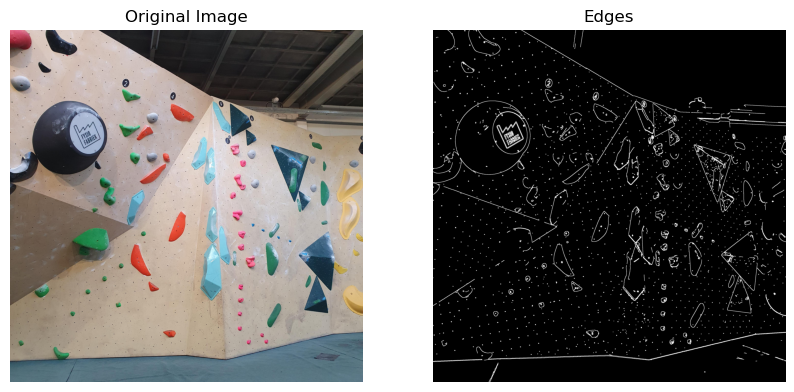

In [58]:
_ = findHolds(img_rgb)

In [20]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Força janela externa
matplotlib.use('TkAgg')

# Lista para coordenadas clicadas
coordenadas = []

# Função de clique
def on_click(event):
    if event.xdata is not None and event.ydata is not None:
        x = int(event.xdata)
        y = int(event.ydata)
        coordenadas.append((x, y))
        print(f"Coordenada registrada: ({x}, {y})")

# Caminho da imagem
caminho_imagem = 'img/parede30.jpg'
imagem_bgr = cv2.imread(caminho_imagem)

if imagem_bgr is None:
    print("Erro: imagem não encontrada.")
else:
    # Converter imagem de BGR para RGB (usado pelo matplotlib)
    imagem_rgb = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)

    # Converter imagem de BGR para HSV
    imagem_hsv = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2HSV)

    # Mostrar imagem e registrar cliques
    fig, ax = plt.subplots()
    ax.imshow(imagem_rgb)
    ax.set_title('Clique nos pontos desejados e feche a janela')
    cid = fig.canvas.mpl_connect('button_press_event', on_click)
    plt.show()

    # Após fechar a imagem
    print("\nCores HSV selecionadas:")
    for (x, y) in coordenadas:
        # Obter a cor HSV na coordenada clicada
        cor_hsv = imagem_hsv[y, x]
        print(f"Coordenada ({x}, {y}): Cor HSV: {cor_hsv}")


Coordenada registrada: (603, 968)
Coordenada registrada: (586, 1016)
Coordenada registrada: (610, 944)
Coordenada registrada: (623, 890)
Coordenada registrada: (590, 869)
Coordenada registrada: (595, 854)
Coordenada registrada: (467, 529)
Coordenada registrada: (478, 494)
Coordenada registrada: (517, 447)
Coordenada registrada: (242, 234)

Cores HSV selecionadas:
Coordenada (603, 968): Cor HSV: [ 13  39 216]
Coordenada (586, 1016): Cor HSV: [178  73 205]
Coordenada (610, 944): Cor HSV: [ 16  46 210]
Coordenada (623, 890): Cor HSV: [ 11  38 206]
Coordenada (590, 869): Cor HSV: [  7  30 215]
Coordenada (595, 854): Cor HSV: [ 13  32 201]
Coordenada (467, 529): Cor HSV: [ 16  33 203]
Coordenada (478, 494): Cor HSV: [ 18  46 214]
Coordenada (517, 447): Cor HSV: [ 17  64 180]
Coordenada (242, 234): Cor HSV: [ 17  63 195]


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

cores = []
for (x, y) in coordenadas:
    # Capturar a cor HSV na posição clicada
    hsv = imagem_hsv[y, x]
    cores.append(hsv)
    print(f"({x}, {y}) -> HSV: {hsv}")

# Criar máscara para cada cor

tolerancia_h = 10  # tolerância para Hue (H)
tolerancia_s = 70  # tolerância para Saturação (S)
tolerancia_v = 30  # tolerância para Valor (V)

for i, cor_hsv in enumerate(cores):
    # A cor selecionada no formato HSV
    h, s, v = cor_hsv

    h = int(h)
    s = int(s)
    v = int(v)
    print(f"Cor {i + 1}: HSV {cor_hsv}")

    # Definir intervalo de tolerância para H, S e V
    # Para Hue (H), precisamos garantir que os valores fiquem entre 0 e 179
    if h - tolerancia_h < 0:
        min_h = 0
    else:
        min_h = np.clip(h - tolerancia_h, 0, 179)
    if h + tolerancia_h > 179:
        max_h = 179
    else:
        max_h = np.clip(h + tolerancia_h, 0, 179)

    # Para Saturação (S) e Valor (V), garantimos que fiquem entre 0 e 255
    if s - tolerancia_s < 0:
        min_s = 0
    else:
        min_s = np.clip(s - tolerancia_s, 0, 255)
    if s + tolerancia_s > 255:
        max_s = 255
    else:
        max_s = np.clip(s + tolerancia_s, 0, 255)
    if v - tolerancia_v < 0:
        min_v = 0
    else:
        min_v = np.clip(v - tolerancia_v, 0, 255)
    if v + tolerancia_v > 255:
        max_v = 255
    else:
        max_v = np.clip(v + tolerancia_v, 0, 255)

    min_cor = np.array([min_h, min_s, min_v], dtype=np.uint8)
    max_cor = np.array([max_h, max_s, max_v], dtype=np.uint8)

    print(f"\nCor {i + 1}: HSV {cor_hsv}")
    print(f"Intervalo HSV: min {min_cor.tolist()} - max {max_cor.tolist()}")

    # Criar a máscara
    mascara = cv2.inRange(imagem_hsv, min_cor, max_cor)

    # Converter imagem original para RGB para exibição
    imagem_rgb = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)

    # Criar uma imagem de saída para a máscara com as cores originais
    imagem_com_cor = np.zeros_like(imagem_rgb)

    # Aplicar a cor original onde a máscara é 255 (na área da cor selecionada)
    imagem_com_cor[mascara == 255] = imagem_rgb[mascara == 255]

    # Criar a janela com 2 subplots: 1 para a imagem original e 1 para a imagem com a máscara colorida
    plt.figure(figsize=(10, 5))  # Tamanho maior para facilitar a visualização
    plt.subplot(1, 2, 1)  # Primeiro subplot (imagem original)
    plt.imshow(imagem_rgb)
    plt.title(f'Imagem Original - Cor {i + 1}')
    plt.axis('off')

    plt.subplot(1, 2, 2)  # Segundo subplot (máscara com cores originais)
    plt.imshow(imagem_com_cor)
    plt.title(f'Máscara Colorida para cor HSV {cor_hsv}')
    plt.axis('off')

    # Mostrar o gráfico com as duas imagens lado a lado
    plt.show()


(1294, 261) -> HSV: [  0 255 136]
(1341, 236) -> HSV: [174 255 174]
(1279, 232) -> HSV: [  1 165 187]
(1134, 172) -> HSV: [  0 255 181]
(1184, 174) -> HSV: [173 255 154]
(1383, 609) -> HSV: [  0 255 212]
(1335, 640) -> HSV: [  0 255 136]
Cor 1: HSV [  0 255 136]

Cor 1: HSV [  0 255 136]
Intervalo HSV: min [0, 185, 106] - max [10, 255, 166]
Cor 2: HSV [174 255 174]

Cor 2: HSV [174 255 174]
Intervalo HSV: min [164, 185, 144] - max [179, 255, 204]
Cor 3: HSV [  1 165 187]

Cor 3: HSV [  1 165 187]
Intervalo HSV: min [0, 95, 157] - max [11, 235, 217]
Cor 4: HSV [  0 255 181]

Cor 4: HSV [  0 255 181]
Intervalo HSV: min [0, 185, 151] - max [10, 255, 211]
Cor 5: HSV [173 255 154]

Cor 5: HSV [173 255 154]
Intervalo HSV: min [163, 185, 124] - max [179, 255, 184]
Cor 6: HSV [  0 255 212]

Cor 6: HSV [  0 255 212]
Intervalo HSV: min [0, 185, 182] - max [10, 255, 242]
Cor 7: HSV [  0 255 136]

Cor 7: HSV [  0 255 136]
Intervalo HSV: min [0, 185, 106] - max [10, 255, 166]


In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Supondo que imagem_bgr, imagem_hsv e coordenadas já estão definidos
mascara_final = np.zeros(imagem_hsv.shape[:2], dtype=np.uint8)

tolerancia_h = 10
tolerancia_s = 40
tolerancia_v = 20

for (x, y) in coordenadas:
    h, s, v = imagem_hsv[y, x]
    h, s, v = int(h), int(s), int(v)

    min_h = np.clip(h - tolerancia_h, 0, 179)
    max_h = np.clip(h + tolerancia_h, 0, 179)
    min_s = np.clip(s - tolerancia_s, 0, 255)
    max_s = np.clip(s + tolerancia_s, 0, 255)
    min_v = np.clip(v - tolerancia_v, 0, 255)
    max_v = np.clip(v + tolerancia_v, 0, 255)

    min_cor = np.array([min_h, min_s, min_v], dtype=np.uint8)
    max_cor = np.array([max_h, max_s, max_v], dtype=np.uint8)

    mascara = cv2.inRange(imagem_hsv, min_cor, max_cor)
    mascara_final = cv2.bitwise_or(mascara_final, mascara)

# Converter imagem BGR para RGB
imagem_rgb = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)

# Aplicar máscara final
resultado = np.zeros_like(imagem_rgb)
resultado[mascara_final == 255] = imagem_rgb[mascara_final == 255]

# Mostrar resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resultado)
plt.title('Regiões Detectadas (Todas as Cores)')
plt.axis('off')
plt.show()
